# **The world of Quantum Algorithms**

To solve problems we need to follow certain steps, these steps altogether resembles an algorithm. In classical cases or in quantum cases the underlying goal is very similar, you will find the problem statement unchanged. It is the principles that we use to challenge those problems creates the realm of classical and quantum algorithms. We have already seen some of these triumphant algorithms in the quantum realm with `teleportation` and `superdense coding`. We discussed how the use of various quantum fundamentals might do things benificially than their classical counterparts. Now we are formally introducing the basics of Quantum algoithms.

Well, there are many incarnations of quantum algorithms. We particularly focus now on the oracle based algorithms.

There are four important concepts behind the working of these quantum algorithms, of which we have already explored **superposition** and **entanglement**. There are another two oracles and measurements.

> Let me elaborate a litte about Oracles. These are essentially a black box, which does the essential computation of the algorithm and we care very less about it's structure. The important thing about this is that these consists elements of reversible type.

The finest of these is measurement and it has a far more sounding effect than the others. Measurement bounds the limits of quantum computation. It provides meaning to the structure and as well reflects it's limitations.
Let us know explore the thoughts behind quantum algorithms.


## **Breaking a lock!**

Reference: pennylane

The problem: Suppose we have a lock, whoose key is a `n` bit string and each bit can take either $0$ bor $1$. Can quantum superposition open something new?

Classical approach:

Well The lock has $2^n$ possible key combinations and of which only one is correct. This exponential rise in the possibilities makes it harder for a classical device to break the lock using trial and error method.

Quantum approach?

Quantum devices has the capabilities of superposition. For example a quantum state can be in superposition of two states.

\begin{align}
\ket{\psi} = \alpha \ket{0} + \beta \ket{1}.
\end{align}

Following the similar note a n qubit state can be prepared as a superposition of all the $2^n$ quantum states

\begin{align}
\ket{\psi} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} \ket{x}.
\end{align}

> *<font color="red">This shows the indication of an all mighty key prepared using our quantum bits, which can be tested on the lock and as it contains the correct key in superposition, the super key will break the lock.</font>*

It appears now that we have turned an exponentially hard classical problem solvable in single shot using quantum device!

Although the real story is quite different. The lock has no accomodation for this super key with all mighty superposition. If you look at the super key, the solution bit string has $\frac{1}{\sqrt{2^n}}$ probability of occurrence upon measurement,. just like the other $n$ bit strings. Thus the super key although super, it's inherent nature is probabilistic and thus superposition itself does'nt help. It is how we shuffle with this superposition to extract out the desired states with high probability matters. Here oracles are studied to do this particular favour for us.



In [1]:
import pennylane as qml

**Exercise: Create an uniform superposition of $2^n$ states**

In [2]:
# Number of qubits
n = 4
# Quantum device
dev = qml.device("default.qubit", wires=n)

@qml.qnode(dev)
# The circuit
def circuit():
    # Your code goes here -> (Return the probabilities of all the computational basis states)
    for wire in range(n):
        qml.Hadamard(wires=wire)
    return qml.probs(wires=range(n))

In [3]:
# Execute the circuit:
circuit()

tensor([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
        0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625], requires_grad=True)

**Understanding the role of Oracles in quantum algorithms**

We know as the oracle consists of unitary elements, the oracle itself is an unitary.
Now we can design an unitary which makes a difference upon acted on the initial state.
We can think of an oracle in the following way:

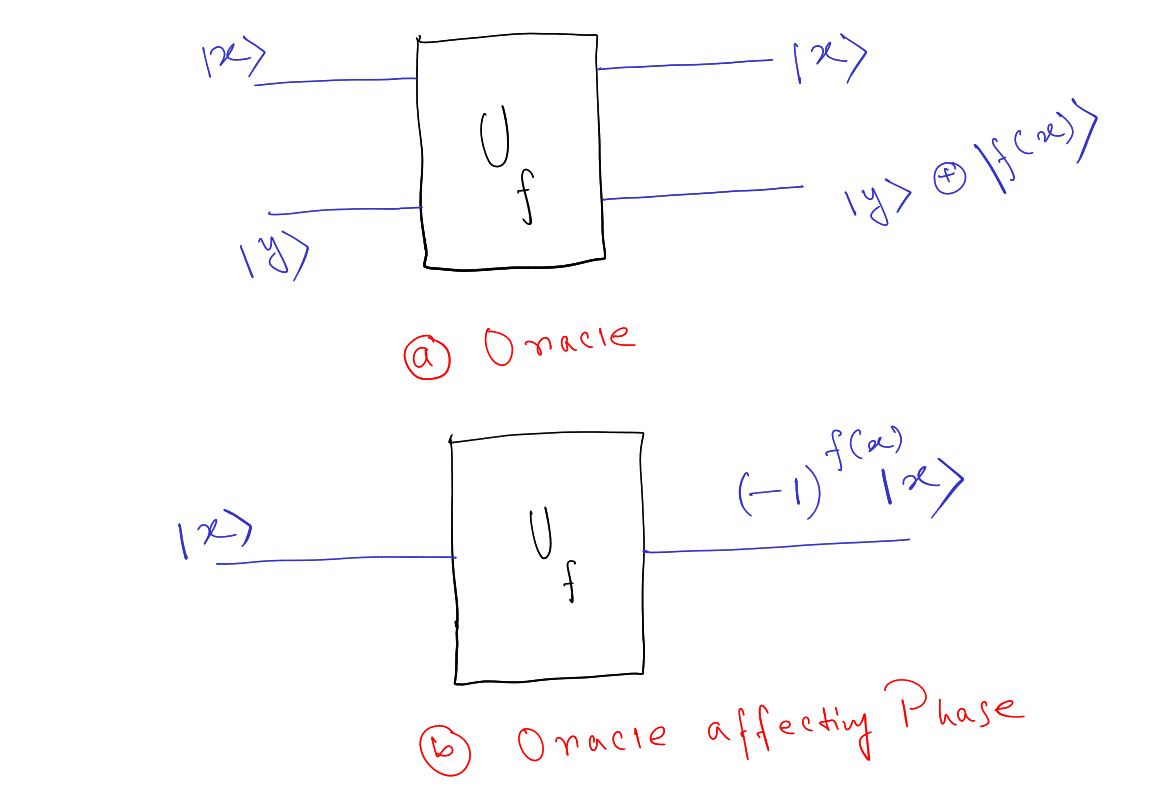

So, let us consider an oracle, which applies a negative phase corresponding to the solution key combination in the superposition state $\ket{\psi}$. The inner structure of the oracle is mysterious and the computer is not allowed to look inside. All we know is that upon called, this blackbox outputs;

\begin{align*}
f(x) &= 1, \text{if x is the solution key combination},\\
     &= 0, otherwise,
\end{align*}

where, $\ket{x} \in \ket{\psi}$. Thus for the solution combination in the superposition, oracle changes the corresponding phase; as par $\ket{x} \to (-1)^{f(x)}\ket{x}$.

If the oracle is denoted by $U_f$, the matrix form of it would be simply,

\begin{align}
U_f = I - 2\ket{\psi}\bra{\psi}
\end{align}

**Task**: Let us see if it makes any difference!

In [4]:
# Import numpy package to handle the arrays.
import numpy as np

**Exercise: Construct the oracle matrix**

In [5]:
def oracle_matrix(combination: list[int]):
    """Return the oracle matrix for a secret combination of key.
    
    Args:
        combination (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combination, [2]*len(combination)) # Index of solution
    
    # Your code goes here ->
    my_array = np.identity(2**len(combination)) # Create the identity matrix
    # MODIFY DIAGONAL ENTRY CORRESPONDING TO SOLUTION INDEX.
    my_array[index][index] = -1
    return my_array

In [6]:
# An example with a key of length 2 bits.
oracle_matrix([0,1])

array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

**Exercise: Apply the oracle onto the initial superkey state**

In [7]:
# The secret key
secret_key = [0,1,1]
# Number of q/bits required
n = len(secret_key)
# Defining the quantum device
dev = qml.device("default.qubit", wires=n)

@qml.qnode(dev)
# Construct the circuit to apply the oracle onto the initial superposition.
def apply_oracle_circuit(combination: list[int]):
    """Create a uniform superposition, apply the oracle, and return probabilities.
    
    Args:
        combination (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: The output probabilities.
    """

    # Your code goes here ->

    # Create the initial superposition
    for wire in range(n):
        qml.Hadamard(wires=wire)
    # Apply the oracle.
    qml.QubitUnitary(U=oracle_matrix(combination), wires=list(range(n)))
    # Return the probabilities of all the possible combinations.
    return qml.probs(wires=range(n))

In [8]:
# Execute
apply_oracle_circuit(secret_key)

tensor([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], requires_grad=True)